# Class project: Indicators of Female Health in Venezuela
By Lusangelis Ramos 
<br>S&DS 123: YData: An Introduction to Data Science



## Introduction 

<font color='purple'> The Venezuelan diaspora is considered the largest displacement crisis in the Americas with an
estimate of 7.72 million migrants and refugees worldwide since mass migration started in 2010s.
Venezuelan political turmoil, hyperinflation, and widespread shortages of food, water, and medicine
have led to the breakdown of Venezuela’s healthcare infrastructure. Around 19.7 million
Venezuelans in the country need humanitarian aid, more than 3 million Venezuelans are food
insecure, and 90% of people in Venezuela live in poverty due to the severity of the humanitarian
crisis (European Commission). The hospitals in Venezuela themselves also suffer
from shortages of clean water, electricity and a lack of medical supplies, which have led some of
them to close (Human Rights Watch,
2020). The unsanitary conditions in the hospitals have made it incredibly difficult to treat sick
Venezuelans and prevent new cases of different diseases. Cases of tuberculosis, measles, diphtheria
and malaria have greatly increased in Venezuela because of the lack of preventative health efforts
(Johns Hopkins| Bloomberg School of Public Health). Infant mortality has increased by 63% and
maternal mortality has also risen greatly from 2012-2016. Additionally, only 10% of Venezuelans
with HIV have access to life-saving treatments or medicines. These dire health outcomes have not
only worsened the life quality of Venezuelans but have also presented an obstacle for Venezuelan
migrants that move to nearby countries. Countries that receive a greater influx of Venezuelan
migrants face high demands for healthcare services from Venezuelans who are not able to get those
services back home. Thus, Venezuelan health systems in crisis pose a huge issue for the health and wellbeing of Venezuelans. 
<br>
<br>
However, the Venezuelan humanitarian crisis disproportionally impacts women and girls who oftentimes lack the right to sexual and reproductive health and who face patriarchal barriers to their wellbeing (Center for Strategic and International Studies, 2020). Thus, I wanted to focus on health indicators related to women in Venezuela. The core questions I am asking are 1) Are Venezuelan women's health indicators more positive or negative compared to the overall Latin American & Caribbean region, other low income countries and the entire world?, 2) How have Venezuelan women's health indicators progressed (increased, decreased, stayed the same) over the course of time?, and 3) When compared to individual countries in the Latin American & Caribbean region region, where do Venezuelan women's health indicators stand? These questions are important to answer since the Venezuelan humanitarian crisis is one of the most - if not the most- underfunded global health crisis in the world (Center for Strategic and International Studies, 2023).
<br>
<br>
Health indicators are a quantifiable estimate of a population's health related to a specific healthcare need or issue. An example of a health indicator is the mortality (death) rate of a given population. For this project, I am using the health datatset from the Gender Data Portal at the World Bank (https://genderdata.worldbank.org/topics/health/). The World Bank has already been able to segregate health indicators by gender which is ideal for my topic. This dataset has indicators for individual countries, multiple regions of the world, and groups of countries that are seperated by income level (low income, high income, etc). Some indicators and regions have more data than others which affects how I am visualizing the data. 

<font color='purple'>The World Bank has executed multiple visualizations including a heatmap of maternal mortality ratio and line chart of adolescent fertility by world and income group. They have also included different visualizations of the prevalence of modern contraceptive methods by income group, births attended by skilled health staff (% of total births) by world and income group, global adult HIV incidence rate by sex, and global cause of death by sex and age group. While they have a website where one can select data for any country and health indicators, they have not explicitly done the analyses and comparisons that I am doing in this project. 

## Data wrangling: 

<font color='purple'> I started my project by importing all necessary packages and the World Bank dataset. I proceeded to make a copy of the original dataset and continously use that so that any errors I made would only affect that copy. I printed out how many rows the original dataset contained in order to use that as a sanity check for when I would eventually manipulate the dataset for my analyses. The original dataset contains 559,493 rows of information. 


In [651]:
#importations for the project 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px 

In [649]:
# loading my dataset from my locally stored files 
file_path = '/Users/lusangelisramos/Downloads/health/Health.csv'
health = pd.read_csv(file_path)
health.head(3)
print(health.shape[0])

559493


In [580]:
# making a copy of the original dataset 
health2=health.copy()
health2=health2.set_index("Indicator Name")
health2.head(5)

,Indicator Code,Country Name,Country Code,Year,Value
Indicator Name,,,,,
"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,Africa Eastern and Southern,AFE,2021,96.181442
"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,Africa Eastern and Southern,AFE,2020,97.413585
"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,Africa Eastern and Southern,AFE,2019,99.085572
"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,Africa Eastern and Southern,AFE,2018,99.491703
"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,Africa Eastern and Southern,AFE,2017,100.963526


## Visualizations and Analyses 

### Part I: Venezuela Compared to the Latin America & Caribbean Region, Low Income Countries and the Rest of the World

<font color='purple'> Are Venezuelan women's health indicators more positive or negative compared to the overall Latin American & Caribbean region, other low income countries and the entire world? In this section, I will be comparing some female health indicator results of Venezuela to the World and two other aggregate regions/categories it belongs to: Latin America & Caribbean Region and Low Income.



In [690]:
#here I am making sure that only these groups used in my analysis 
names= ["Venezuela, RB","Latin America & Caribbean ","World","Low income"] 

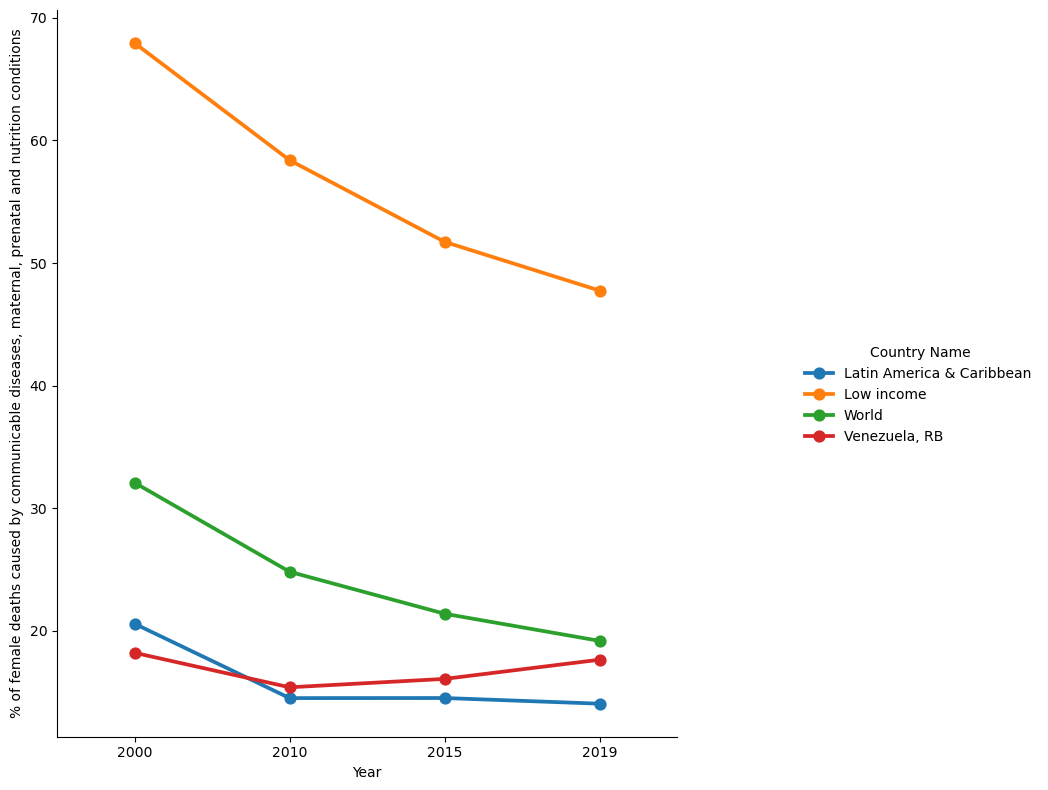

In [647]:
cd_data=health2.loc["Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, female (% of female population)"]
cd_mpn= cd_data[cd_data["Country Name"].isin(names)]
cd_mpn_plot= sns.catplot(data=cd_mpn, x="Year",y="Value", hue="Country Name", kind="point")#, #col="Country Name") 
cd_mpn_plot.set(xlabel="Year")
cd_mpn_plot.set(ylabel="% of female deaths caused by communicable diseases, maternal, prenatal and nutrition conditions");

cd_mpn_plot.fig.set_size_inches(10.5, 8) 
cd_mpn_plot.tight_layout();

<font color='purple'> Above is a line plot of the percentage of female deaths caused by communicable diseases, maternal, prenatal and 
nutrition conditions by the following regions/classifications: Venezuela, Latin America & Caribbean, 
Low Income and the World from 2000-2019. While the Low income countries group has an overall higher percentage of female deaths 
attributed to the aforementioned, Venezuela is the only group that is seeing a net positive change from 2010 to 2019,
which means that there is a growing number of female deaths attributed to communicable diseases, maternal, prenatal and 
nutrition conditions. The other groups are generally seeing a downwards trend over the years. These results are in line 
with the reality that there is a lot of food insecurty and need for humanitarian aid in Venezuela. 


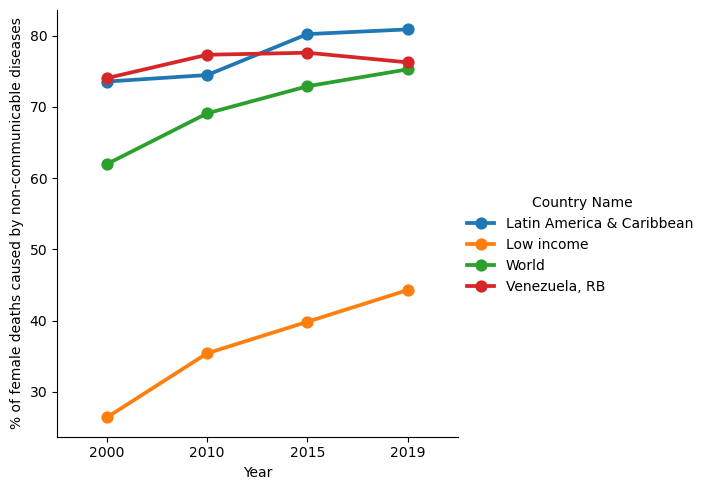

In [583]:
ncd_data=health2.loc["Cause of death, by non-communicable diseases, female (% of female population)"]
ncd= ncd_data[ncd_data["Country Name"].isin(names)]
ncd_plot= sns.catplot(data=ncd, x="Year",y="Value", hue="Country Name", kind="point")
ncd_plot.set(xlabel="Year")
ncd_plot.set(ylabel="% of female deaths caused by non-communicable diseases");

<font color='purple'> Above is another line plot but this time it's of the percentage of female deaths caused by non-communicable diseases. 
Aside from Venezuela, Latin America & Caribbean, the World, and Low income countries have been seeing an increase in the 
percentage of female deaths from 2000-2019 with Latin America & Caribbean having the highest values for every year, followed
by the World and then Low income countries. Venezuela had higher values in 2000 and 2010 but has been seeing a net decrease in 
values from 2010-2019 for percentage of female deaths caused by non-communicable diseases. This makes sense given that
my previous graph showed a net positive change in the percentage of  female deaths attributed to communicable diseases, 
maternal,prenatal and nutrition conditions. 


### Part II: National Venezuelan Female Health Indicators 

<font color='purple'>How have Venezuelan women's health indicators progressed (increased, decreased, stayed the same) over the course of time? In this section, I will be plotting interactive graphs related to female health indicators of Venezuela only across the years that were
available in my datatset. 



In [663]:
# here I am selecting for Venezuela specifically 
names2= ["Venezuela, RB"] 
vn_available= health2[health2["Country Name"].isin(names2)]

# here I am making sure I select for the following indicstors only 
of_interest=["Mortality rate, adult, female (per 1,000 female adults)", "Mortality rate, under-5, female (per 1,000 live births)",
             "Mortality rate, infant, female (per 1,000 live births)"] 
ve_female=vn_fe_male[vn_fe_male["Indicator Name"].isin(of_interest)]
ve_female=ve_female[ve_female["Year"]>=2000]
ve_female.head(3)

,Indicator Name,Indicator Code,Country Name,Country Code,Year,Value
62,"Mortality rate, adult, female (per 1,000 femal...",SP.DYN.AMRT.FE,"Venezuela, RB",VEN,2021,115.516
63,"Mortality rate, adult, female (per 1,000 femal...",SP.DYN.AMRT.FE,"Venezuela, RB",VEN,2020,110.380
64,"Mortality rate, adult, female (per 1,000 femal...",SP.DYN.AMRT.FE,"Venezuela, RB",VEN,2019,97.599


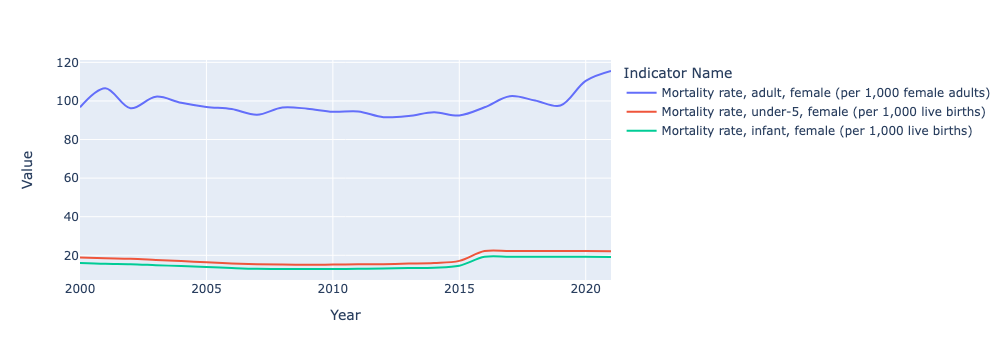

In [664]:
vn_female_plot= px.line(data_frame=ve_female, x="Year",y="Value", hover_name="Value", color="Indicator Name")
vn_female_plot = px.line(ve_female,x="Year",y="Value", hover_name="Value", color="Indicator Name",render_mode="svg",
                        line_group="Indicator Name", line_shape="spline")        
vn_female_plot.show()

<font color='purple'> From plotting the mortality rate of female adults, infants and children under-5, it is noticeable that from 2000-2020, female adults have had the highest mortality rate compared to infants and children under-5. We previously saw some of the causes of female deaths in Venezuela but right now, it is unexplicable why there is a big discrepancy between adults, infants and childrens since infants and children tend to be very vulnerable to illness and conflict. 

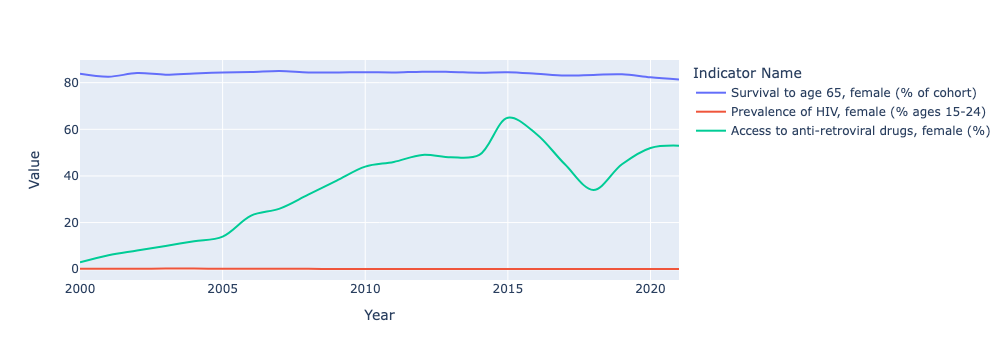

In [671]:
of_interest2=["Survival to age 65, female (% of cohort)", "Prevalence of HIV, female (% ages 15-24)","Access to anti-retroviral drugs, female (%)"]
ve_female2=vn_fe_male[vn_fe_male["Indicator Name"].isin(of_interest2)]
ve_female2=ve_female2[ve_female2["Year"]>=2000]
ve_female2.head(1000)
vn_female2_plot= px.line(ve_female2,x="Year",y="Value", hover_name="Value", color="Indicator Name",render_mode="svg",
                        line_group="Indicator Name", line_shape="spline")

vn_female2_plot.show()

<font color='purple'> Above is an interactive line plot of the percentage of women that survive to age 65, percentage of girls/women (15-24 years old) that have HIV, and percentage of female Venezuelans that have access to anti-retroviral drugs (life-saving HIV drug)
from 2000-2021. It is apparent that the vast majority of Venezuelan women are living to age 65 and that there is very little 
prevalence of HIV among girls/women (15-24 years old). There is a lot of fluctuation happening with the percentage of 
female Venezuelans that have access to anti-retroviral drugs with there being a decrease from 2015-2018 and then an increase from 2018-2021. 


### Part III: Venezuela and Individual Countries in the Latin American & Caribbean Region 

<font color='purple'>When compared to individual countries in the Latin American & Caribbean region region, where do Venezuelan women's health indicators stand? In this section, I will be plotting health indicators of Venezuela and other countries in Latin America and the Caribbean.  

In [686]:
latam_names= ["Argentina", "Belize", "Bolivia",  
"Brazil", "Chile", "Colombia", 
"Costa Rica","Cuba","Dominican Republic","Ecuador", 
"El Salvador","Guatemala","Haiti", "Honduras",
"Mexico", "Nicaragua","Panama", "Paraguay", "Peru","Uruguay",
"Venezuela, RB", "Guyana","Suriname","Jamaica", "Trinidad and Tobago", 
"Bahamas, The","Barbados","St. Lucia", "St. Vincent and the Grenadines",
"Grenada","Antigua and Barbuda"]

latam_mr=health2.loc["Maternal mortality ratio (modeled estimate, per 100,000 live births)"]
latam_mr= latam_mr[latam_mr["Country Name"].isin(latam)]
latam_mr.reset_index(inplace=True)
latam_mr= latam_mr[latam_mr["Country Name"].isin(latam_names)]

latam_mr.head(3)

,Indicator Name,Indicator Code,Country Name,Country Code,Year,Value
0,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,Antigua and Barbuda,ATG,2020,21.0
1,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,Antigua and Barbuda,ATG,2019,19.0
2,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,Antigua and Barbuda,ATG,2018,19.0


In [688]:
latam_wide = latam_mr.pivot_table(index = 'Country Name', 
                                   columns = 'Year', 
                                    values = 'Value', 
                                    aggfunc = 'mean')
latam_wide.head(3)

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Antigua and Barbuda,51.0,47.0,41.0,44.0,43.0,34.0,35.0,34.0,39.0,37.0,31.0,31.0,30.0,29.0,23.0,27.0,21.0,21.0,19.0,19.0,21.0
Argentina,72.0,72.0,71.0,79.0,73.0,63.0,61.0,63.0,59.0,57.0,55.0,50.0,45.0,43.0,42.0,39.0,40.0,38.0,34.0,33.0,45.0
Barbados,48.0,49.0,47.0,45.0,43.0,43.0,42.0,40.0,54.0,53.0,53.0,53.0,52.0,51.0,49.0,49.0,48.0,47.0,47.0,47.0,39.0


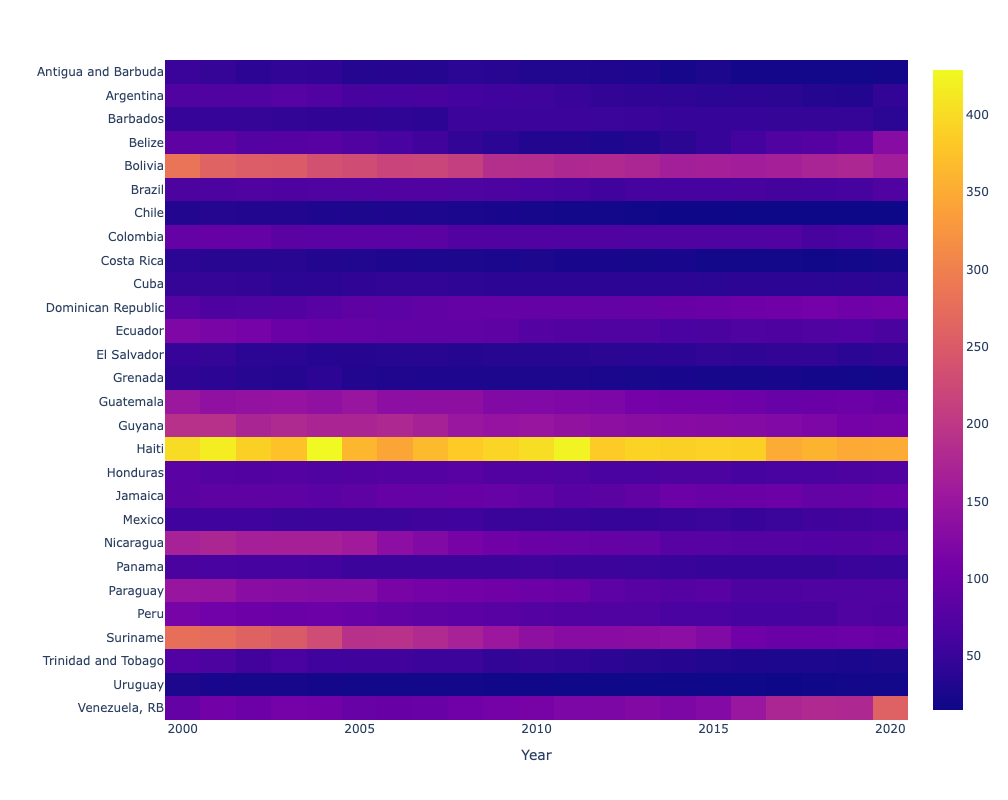

In [689]:
fig = px.imshow(latam_wide)
fig.update_layout(xaxis_title = "Year", yaxis_title = "")
fig.update_layout(height=800, width=1000)

<font color='purple'> This heatmap is showing maternal mortality ratio (per 100,000 live births) from 2000-2020 for the majority of countries in Latin America. The one country that stands out the most is Haiti with consistently having the highest maternal mortality ratio (per 100,000 live births)from 2000-2020. While more analyses should be done to further intepret this heatmap, Venezuela has the second highest maternal mortality ratio in 2020 at 259 while Haiti 
continued having the highest at 350.

## Conclusions

<font color='purple'> Although more visualizations and charts need to be incorporated into each section, I generally found that health outcomes are becoming worse for women in Venezuela. 

<font color='purple'> The graphs in Part 1 show us that Venezuela health indicators
might not necessarily be bigger than that found in the other groups but there is an increasing rate of change of female deaths attributed to communicable diseases, maternal, prenatal and nutrition conditions from 2010 to 2019. The Part II graphs show us that mortality rate of female adults, infants, and children under-5 are growing (at different rates) with the female adult mortality rate being the highest in 2020. The heatmap from Part III also shows us that there's been a net increase in the maternal mortality ratio in Venezuela from 2000 to 2020 with Venezuela has the second highest maternal mortality ratio in 2020 out of all the Latin American and Caribbean countries. 

<font color='purple'> While I would need to calculate the exact rate of change of all these health indicators presented for Venezuela and 
other regions and include many more measures, it does seem like the data is supporting the fact that the Venezuelan healthcare system is in crisis/dysfunctional which is resulting in worst health outcomes for Venezuelan women.

## Reflection

<font color='purple'> I think that plotting national Venezuela health indicators by themselves and plotting them against other regions in Part I went really well. At first, however, it was a bit hard to diversify my plot because how limited my dataset was. My dataset mainly includes country information, year, health indicators, and value. If it included population, gdp, funding put towards healthcare, or other determinants of health then I would have found much easier ways to analyzing the data. 

<font color='purple'>I spent over 10 hours on this project and I included many more analyses (belonging to Part I and Part II)
that I added to the appendix. Some of them also included comparing health indicators for male vs female in Venezuela. 

## Appendix (optional)
<font color='purple'>Here are the extra graphs that I created using my dataset. I will later determine whether or not I include them in the final draft of my project. 


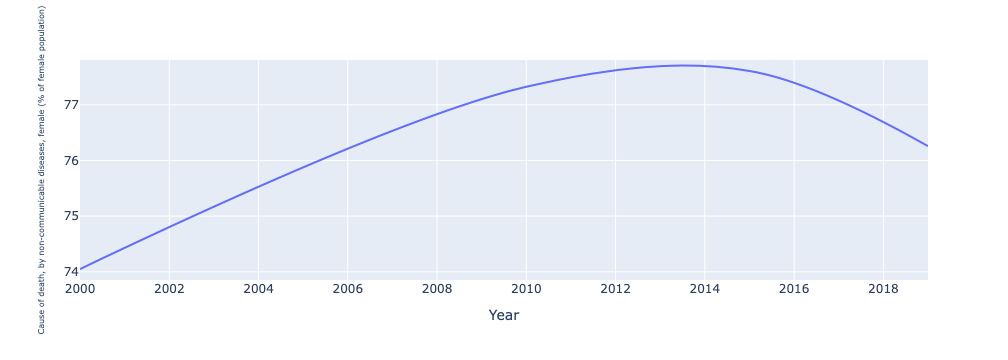

In [665]:

ve_female3 = vn_fe_male[vn_fe_male["Indicator Name"].isin(["Cause of death, by non-communicable diseases, female (% of female population)"])]

vn_female3_plot= px.line(ve_female3,x="Year",y="Value", hover_name="Value",render_mode="svg",
                     line_group="Indicator Name", line_shape="spline")

vn_female3_plot.update_yaxes(title_text="Cause of death, by non-communicable diseases, female (% of female population)",title_font_size=8)
vn_female3_plot.show()


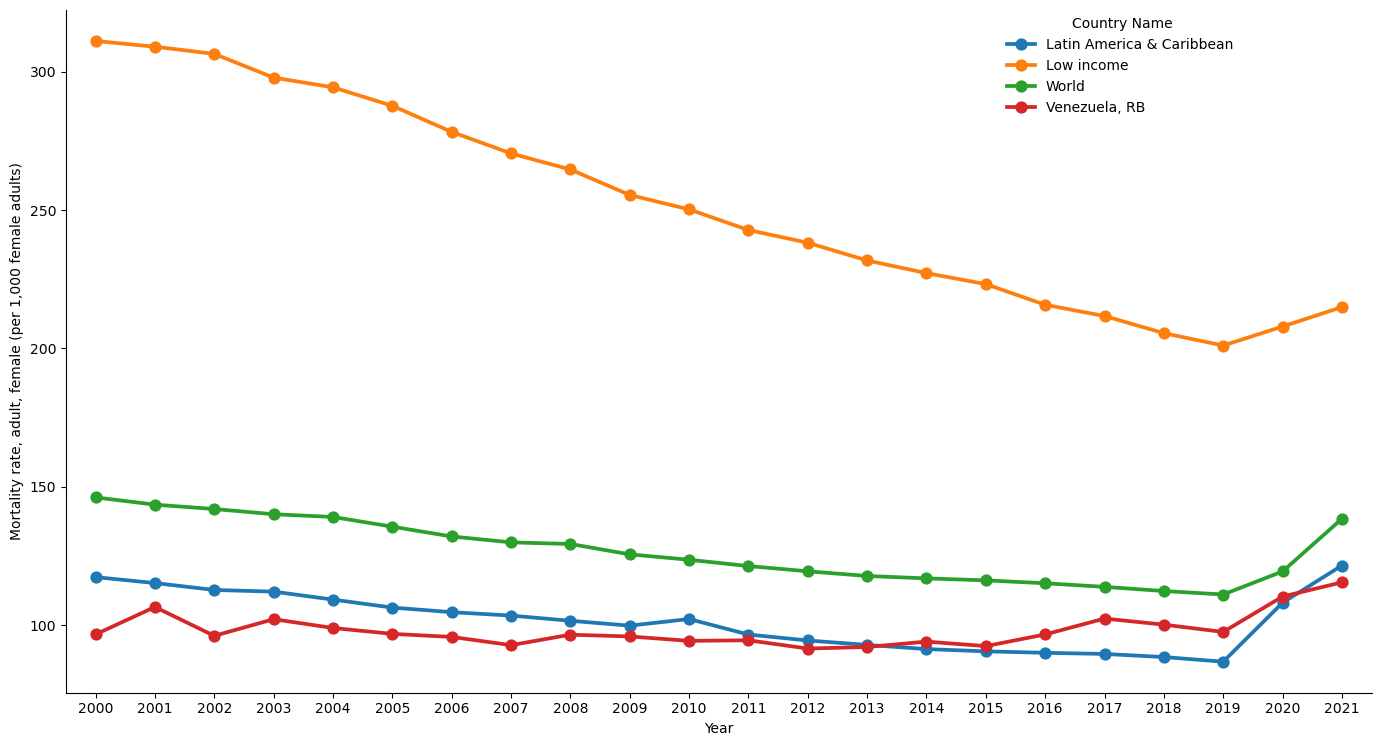

In [589]:
wm_data=health2.loc["Mortality rate, adult, female (per 1,000 female adults)"]
woman_mortality= wm_data[wm_data["Country Name"].isin(names)]
woman_mortality=woman_mortality[woman_mortality["Year"]>=2000]
wm_plot= sns.catplot(data=woman_mortality, x="Year",y="Value", hue="Country Name", kind="point")
wm_plot.set(xlabel="Year")
wm_plot.set(ylabel="Mortality rate, adult, female (per 1,000 female adults)");
wm_plot.fig.set_size_inches(25, 8) 
wm_plot._legend.set_bbox_to_anchor((0.50, 0.85))

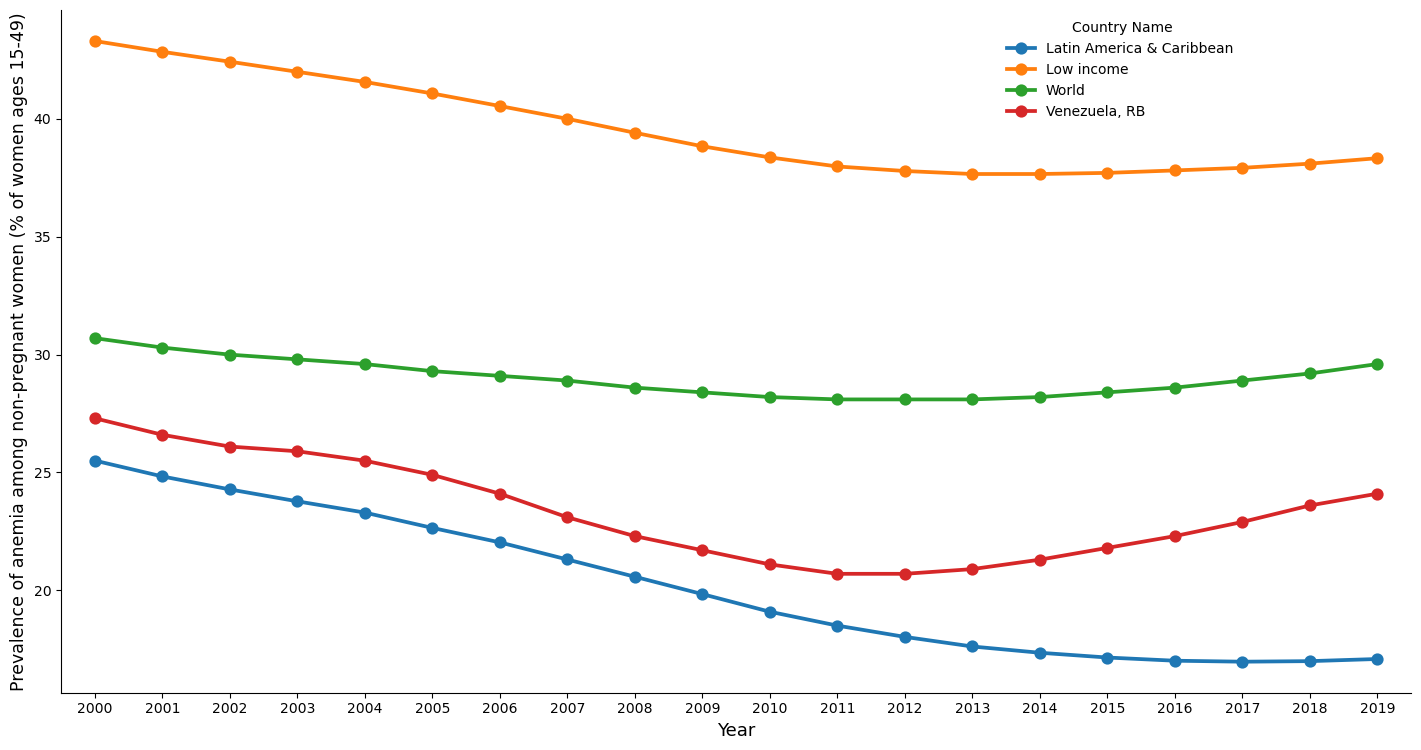

In [588]:
anemia2_data=health2.loc["Prevalence of anemia among non-pregnant women (% of women ages 15-49)"]
anemia2= anemia2_data[anemia2_data["Country Name"].isin(names)]
anemia2_plot= sns.catplot(data=anemia2, x="Year",y="Value", hue="Country Name", kind="point")

for ax in anemia2_plot.axes.flat:
    ax.set_xlabel("Year", fontsize=13)

for ax in anemia2_plot.axes.flat:
    ax.set_ylabel("Prevalence of anemia among non-pregnant women (% of women ages 15-49)", fontsize=12.5)

anemia2_plot.fig.set_size_inches(25, 8) 
anemia2_plot._legend.set_bbox_to_anchor((0.50, 0.85))

In [597]:
country_list=["Afghanistan", "Albania", "Algeria", "Angola", "Antigua and Barbuda", 
"Argentina", "Armenia", "Australia", "Austria", "Azerbaijan", 
"Bahamas,The", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium",
"Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", 
"Brazil", "Brunei Darussalam", "Bulgaria", "Burkina Faso", "Burundi", 
"Cabo Verde", "Cambodia", "Cameroon", "Canada", "Central African Republic", 
"Chad", "Chile", "China", "Colombia", "Comoros", "Congo,Dem.Rep.", "Congo,Rep.", 
"Costa Rica", "Cote d'Ivoire", "Croatia", "Cuba", "Cyprus", "Czechia", "Denmark", "Djibouti", 
"Dominican Republic", "Ecuador", "Egypt,Arab Rep.", "El Salvador", "Equatorial Guinea", 
"Eritrea", "Estonia", "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia, The", 
"Georgia", "Germany", "Ghana", "Greece", "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", 
"Haiti", "Honduras", "Hungary", "Iceland", "India", "Indonesia", "Iran, Islamic Rep.", 
"Iraq", "Ireland", "Israel", "Italy", "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya", 
"Kiribati", "Korea,Dem.People'sRep.", "Korea,Rep.", "Kuwait", "Kyrgyz Republic", "Lao PDR", "Latvia", 
"Lebanon", "Lesotho", "Liberia", "Libya", "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", 
"Maldives", "Mali", "Malta", "Mauritania", "Mauritius", "Mexico", "Micronesia,Fed.Sts.", 
"Moldova", "Mongolia", "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nepal",
"Netherlands", "New", "Zealand", "Nicaragua", "Niger", "Nigeria", "North Macedonia", 
"Norway", "Oman", "Pakistan", "Panama", "Papua New Guinea", "Paraguay", "Peru", 
"Philippines", "Poland", "Portugal", "Qatar", "Romania", "Russian Federation", 
"Rwanda", "Samoa", "Sao Tome and Principe", "Saudi Arabia", "Senegal", 
"Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovak Republic", "Slovenia",
"Solomon Islands", "Somalia", "South Africa", "South Sudan", "Spain", "Sri Lanka", "St.Lucia", "St.Vincent and the Grenadines", 
"Sudan", "Suriname", "Sweden", "Switzerland", "Syrian Arab Republic", "Tajikistan", "Tanzania", "Thailand", 
"Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago", "Tunisia", "Turkiye", "Turkmenistan", 
"Uganda", "Ukraine", "United Arab Emirates", "United Kingdom", "United States", 
"Uruguay", "Uzbekistan", "Vanuatu", "Venezuela,RB", "Viet Nam", "Yemen,Rep.", "Zambia", "Zimbabwe"]

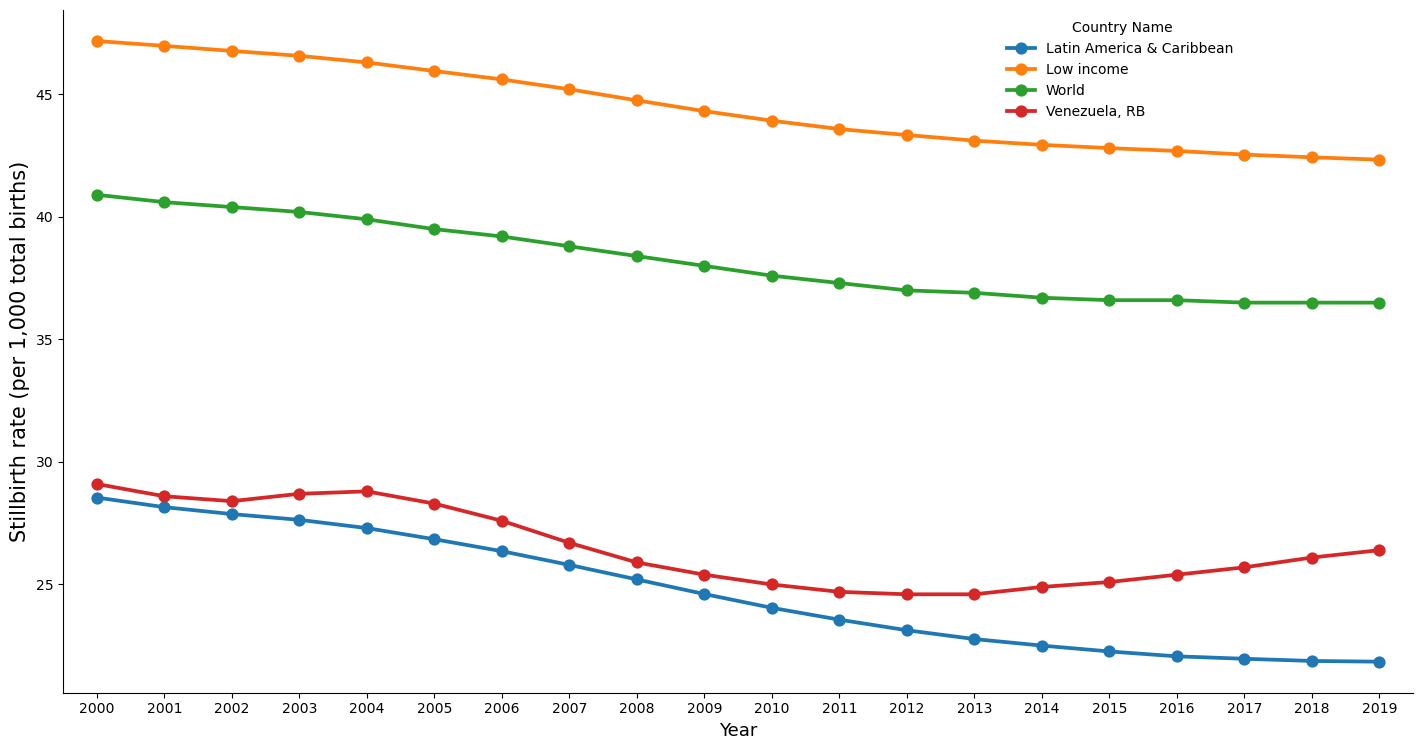

In [587]:
anemia_data=health2.loc["Prevalence of anemia among pregnant women (%)"]

anemia= anemia_data[anemia_data["Country Name"].isin(names)]
anemia_plot= sns.catplot(data=anemia, x="Year",y="Value", hue="Country Name", kind="point")
anemia_plot.set(xlabel="Year")
anemia_plot.set(ylabel="Prevalence of anemia among pregnant women (%)");

for ax in anemia_plot.axes.flat:
    ax.set_xlabel("Year", fontsize=13)

for ax in anemia_plot.axes.flat:
    ax.set_ylabel("Stillbirth rate (per 1,000 total births)", fontsize=15)

anemia_plot.fig.set_size_inches(25, 8) 
anemia_plot._legend.set_bbox_to_anchor((0.50, 0.85))


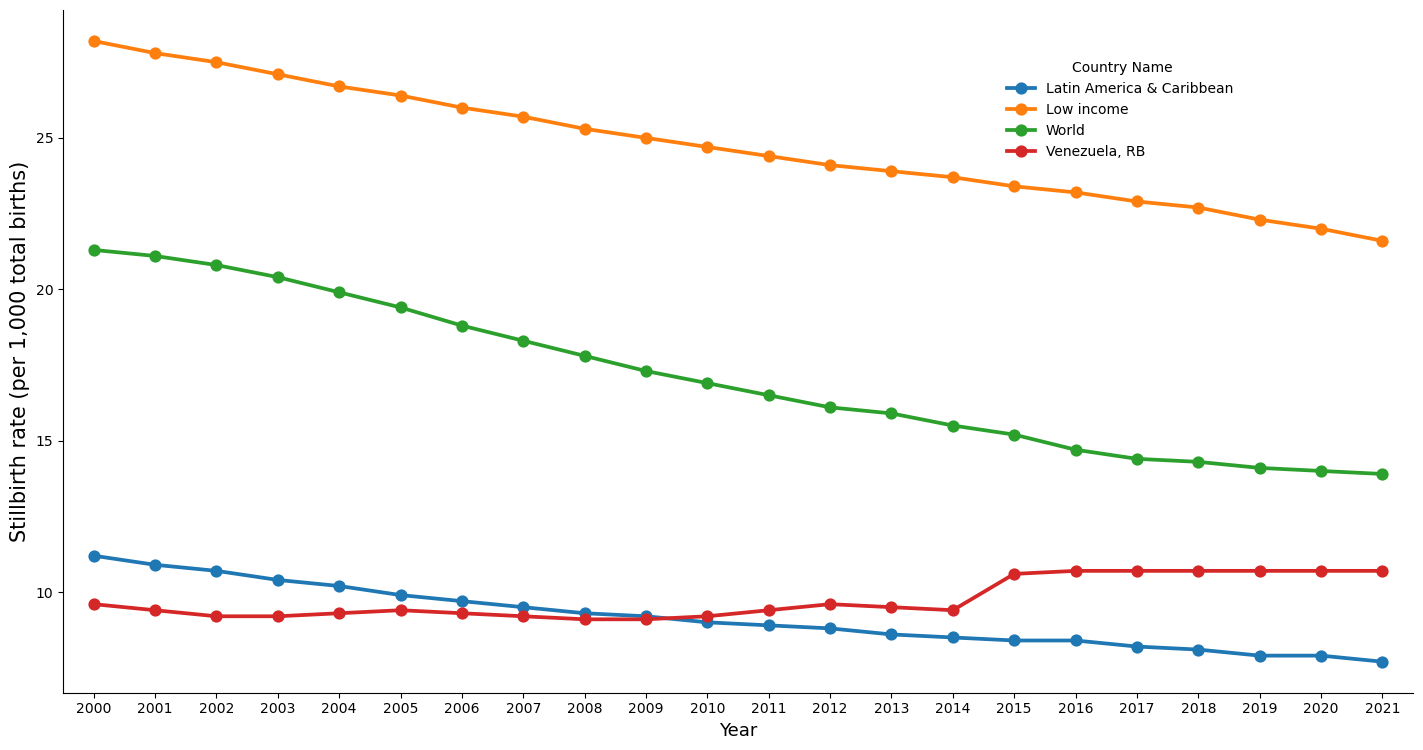

In [586]:
stillbirth_data=health2.loc["Stillbirth rate (per 1,000 total births)"]

stillbirth= stillbirth_data[stillbirth_data["Country Name"].isin(names)]

stillbirth_plot= sns.catplot(data=stillbirth, x="Year",y="Value", hue="Country Name", kind="point")

for ax in stillbirth_plot.axes.flat:
    ax.set_xlabel("Year", fontsize=13)

for ax in stillbirth_plot.axes.flat:
    ax.set_ylabel("Stillbirth rate (per 1,000 total births)", fontsize=15)

stillbirth_plot.fig.set_size_inches(25, 8) 
stillbirth_plot._legend.set_bbox_to_anchor((0.50, 0.80))


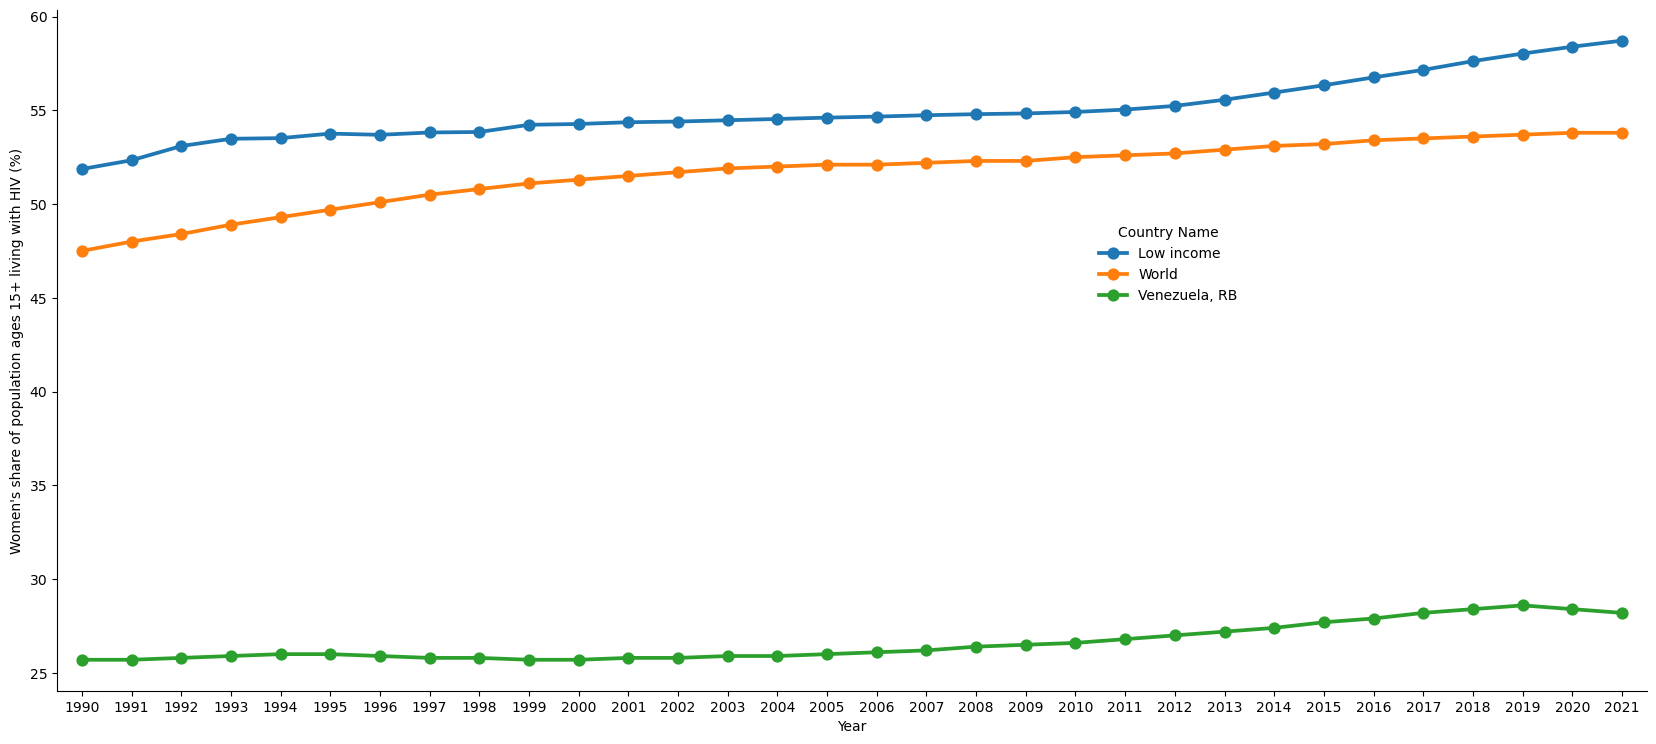

In [590]:
HIV_data=health2.loc["Women's share of population ages 15+ living with HIV (%)"]
HIV= HIV_data[HIV_data["Country Name"].isin(names)]
HIV_plot= sns.catplot(data=HIV, x="Year",y="Value", hue="Country Name", kind="point")
HIV_plot.set(xlabel="Year")
HIV_plot.set(ylabel="Women's share of population ages 15+ living with HIV (%)");
HIV_plot.fig.set_size_inches(25, 8) 
HIV_plot._legend.set_bbox_to_anchor((0.50, 0.60))

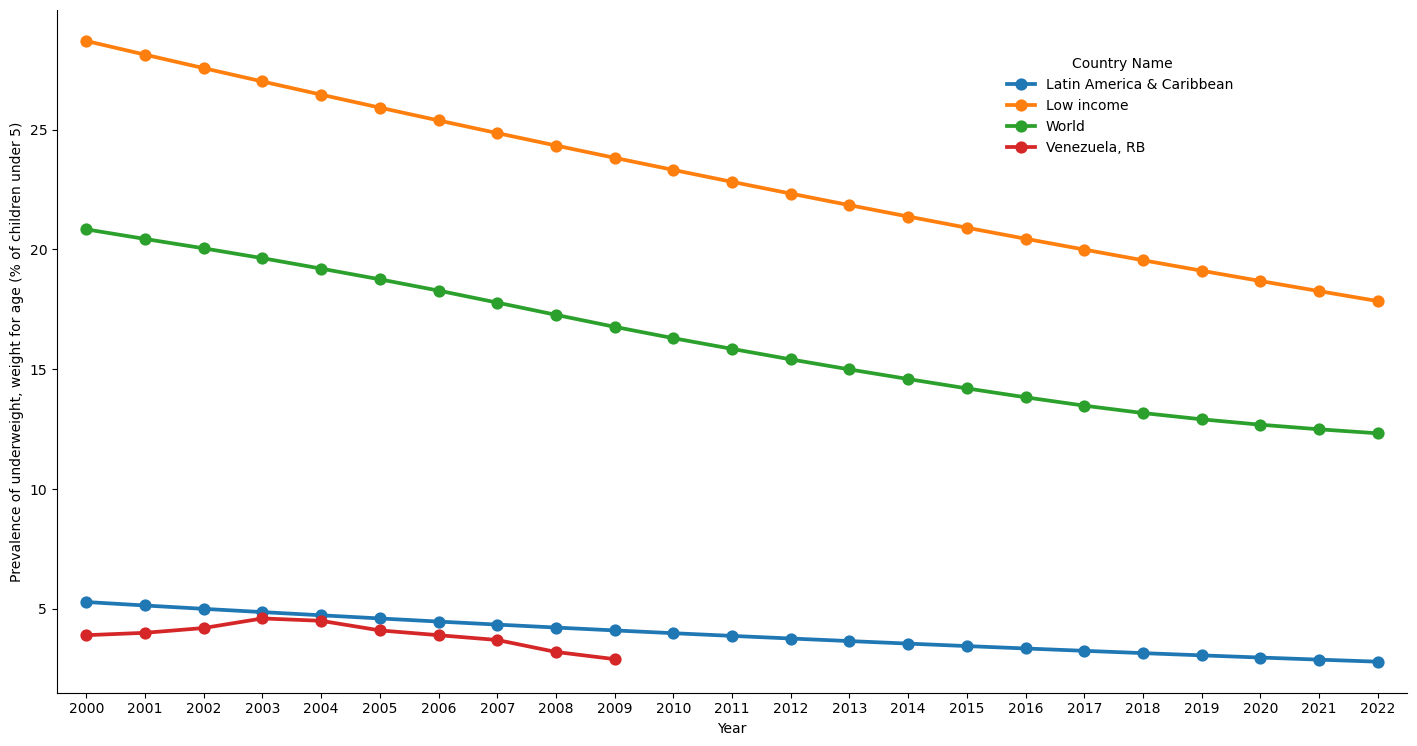

In [591]:
underweight_data=health2.loc["Prevalence of underweight, weight for age (% of children under 5)"]
underweight= underweight_data[underweight_data["Country Name"].isin(names)]
underweight=underweight[underweight["Year"]>=2000]
underweight_plot= sns.catplot(data=underweight, x="Year",y="Value", hue="Country Name", kind="point")
underweight_plot.set(xlabel="Year")
underweight_plot.set(ylabel="Prevalence of underweight, weight for age (% of children under 5)");
underweight_plot.fig.set_size_inches(25, 8) 
underweight_plot._legend.set_bbox_to_anchor((0.50, 0.80))

In [552]:
# to see what indicator values were available for Venezuela specifically 
names2= ["Venezuela, RB"] 
vn_available= health2[health2["Country Name"].isin(names2)]
vn_counts = vn_available.index.value_counts()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Print the counts of each color
#print(vn_counts)

In [537]:
mortality_rate=health2[health2.loc("Mortality rate, adult, female (per 1,000 female adults)")]
mortality_rate.reset_index(inplace=True)
mortality_rate= mortality_rate[mortality_rate["Country Name"].isin(latam)]
latam_mortalityrate= sns.catplot(data = mortality_rate, 
            x = 'Year',
            y= 'Value',
            kind = 'box',
            col= 'Country Name',
            col_wrap=3);
latam_mortalityrate.set(xlabel="Year");
latam_mortalityrate.set(ylabel="Mortality rate, adult, female (per 1,000 female adults)");

ValueError: No axis named Mortality rate, adult, female (per 1,000 female adults) for object type DataFrame

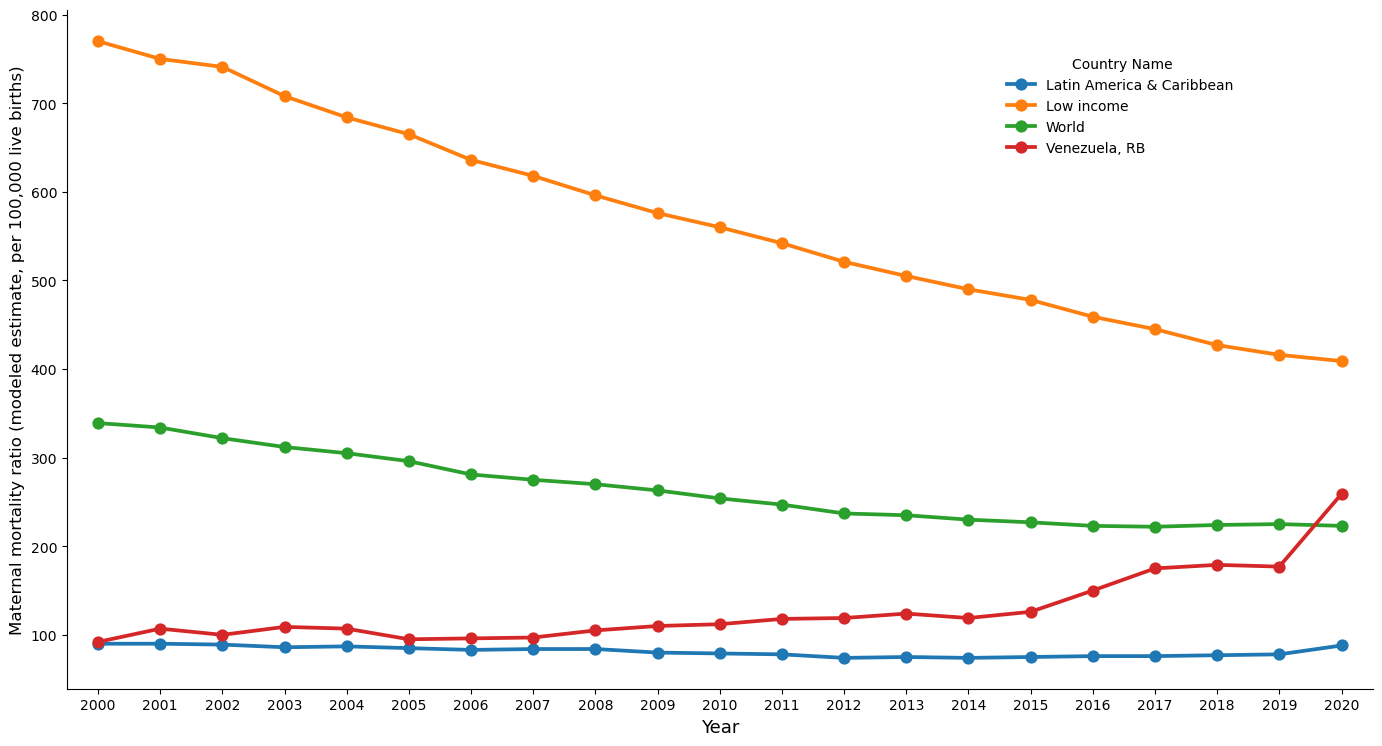

In [584]:
mm_data=health2.loc["Maternal mortality ratio (modeled estimate, per 100,000 live births)"]
maternal_mortality= mm_data[mm_data["Country Name"].isin(names)]

mm_plot= sns.catplot(data=maternal_mortality, x="Year",y="Value", hue="Country Name", kind="point")

for ax in mm_plot.axes.flat:
    ax.set_xlabel("Year", fontsize=13)

for ax in mm_plot.axes.flat:
    ax.set_ylabel("Maternal mortality ratio (modeled estimate, per 100,000 live births)", fontsize=12)

# Adjust the size of the plot
mm_plot.fig.set_size_inches(25, 8) 

mm_plot._legend.set_bbox_to_anchor((0.50, 0.80))

In [499]:
WASH_countries=health2.loc["Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)"]
WASH= WASH_countries[WASH_countries["Country Name"].isin(latam)]
WASH["Value"]=WASH["Value"].astype(int)
WASH.head(3)

/var/folders/5r/6ksfq_q13tz1z_vz8b4fdcw00000gn/T/ipykernel_54198/2898894535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WASH["Value"]=WASH["Value"].astype(int)


,Indicator Code,Country Name,Country Code,Year,Value
Indicator Name,,,,,
"Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)",SH.STA.WASH.P5,Antigua and Barbuda,ATG,2019,2
"Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)",SH.STA.WASH.P5,Argentina,ARG,2019,11
"Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)",SH.STA.WASH.P5,Barbados,BRB,2019,7


In [204]:
vn_fe_male_mr= vn_fe_male[vn_fe_male["Indicator Name"].isin(["Mortality rate, adult, male (per 1,000 male adults)", "Mortality rate, adult, female (per 1,000 female adults)"])]
vn_fe_male_mr.head(3)

,Indicator Name,Indicator Code,Country Name,Country Code,Year,Value
0,"Mortality rate, adult, male (per 1,000 male ad...",SP.DYN.AMRT.MA,"Venezuela, RB",VEN,2021,248.498
1,"Mortality rate, adult, male (per 1,000 male ad...",SP.DYN.AMRT.MA,"Venezuela, RB",VEN,2020,241.044
2,"Mortality rate, adult, male (per 1,000 male ad...",SP.DYN.AMRT.MA,"Venezuela, RB",VEN,2019,230.673


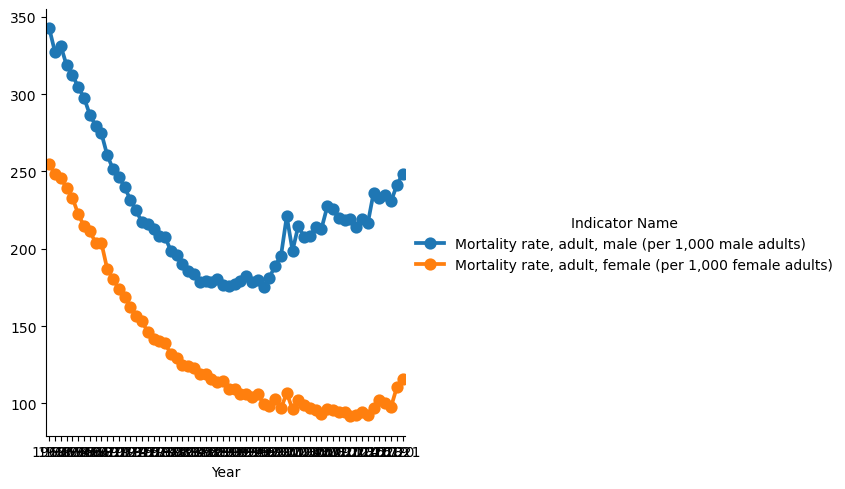

In [208]:
vn_plot=sns.catplot(data = vn_fe_male_mr, 
            x = 'Year',
            y= 'Value',
            kind = 'point',
            hue= 'Indicator Name');
vn_plot.set(xlabel="Year");
vn_plot.set(ylabel="");

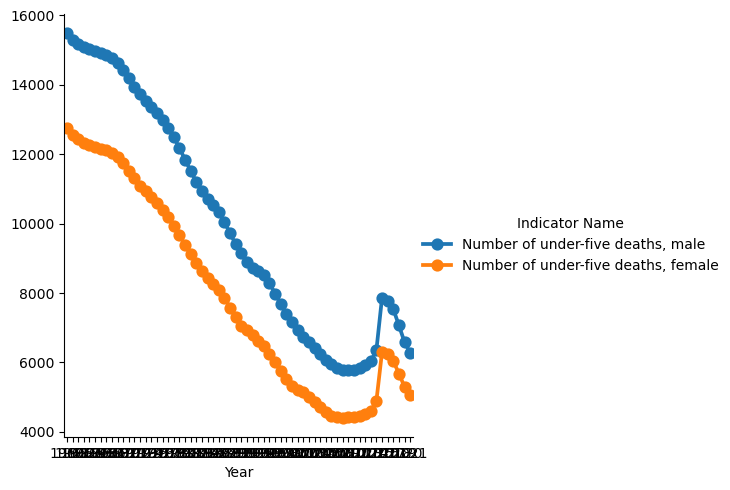

In [209]:
vn_fe_male_under5= vn_fe_male[vn_fe_male["Indicator Name"].isin(["Number of under-five deaths, male", "Number of under-five deaths, female"])]

vn_plot2=sns.catplot(data = vn_fe_male_under5, 
            x = 'Year',
            y= 'Value',
            kind = 'point',
            hue= 'Indicator Name');
vn_plot2.set(xlabel="Year");
vn_plot2.set(ylabel="");


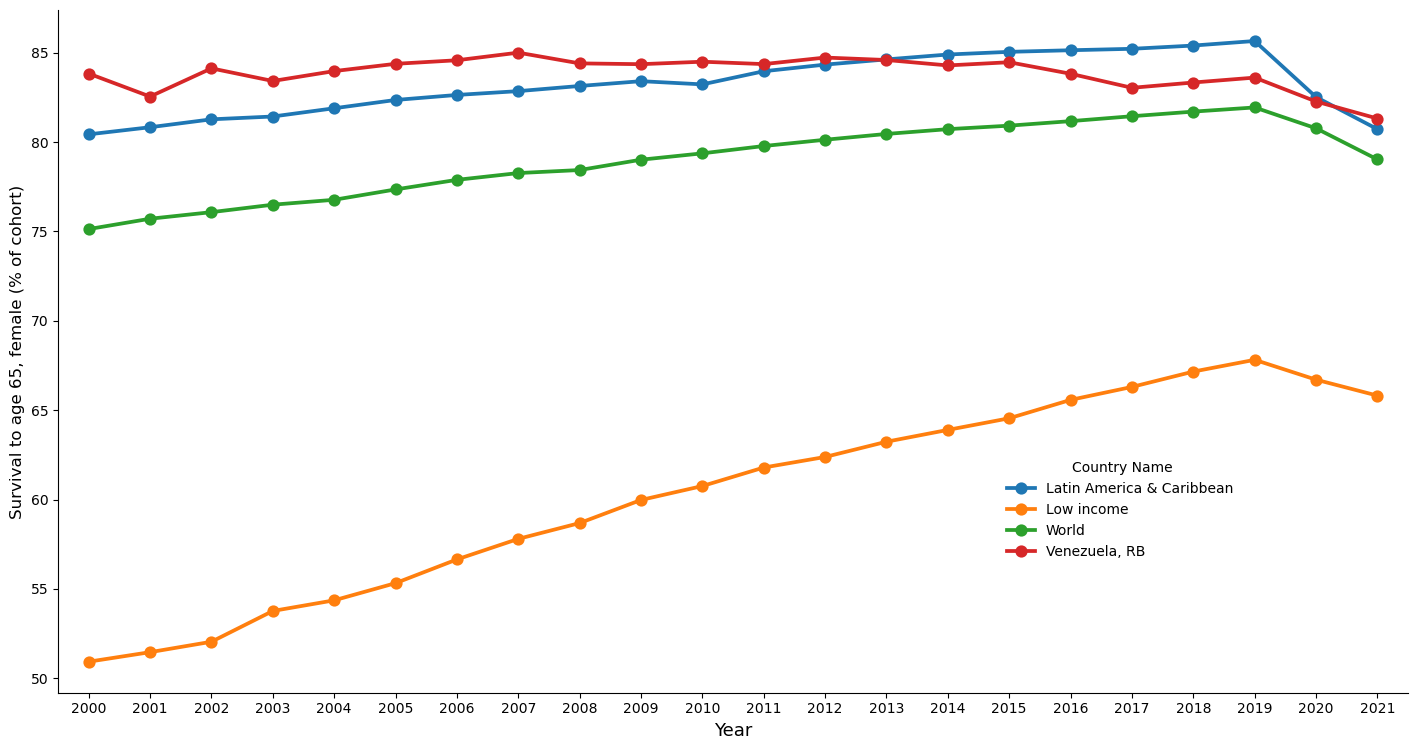

In [585]:
survival_data=health2.loc["Survival to age 65, female (% of cohort)"]
survival= survival_data[survival_data["Country Name"].isin(names)]
survival=survival[survival["Year"]>=2000]
survival_plot= sns.catplot(data=survival, x="Year",y="Value", hue="Country Name", kind="point")

for ax in survival_plot.axes.flat:
    ax.set_xlabel("Year", fontsize=13)

for ax in survival_plot.axes.flat:
    ax.set_ylabel("Survival to age 65, female (% of cohort)", fontsize=12)

survival_plot.fig.set_size_inches(25, 8) 
survival_plot._legend.set_bbox_to_anchor((0.50, 0.3))

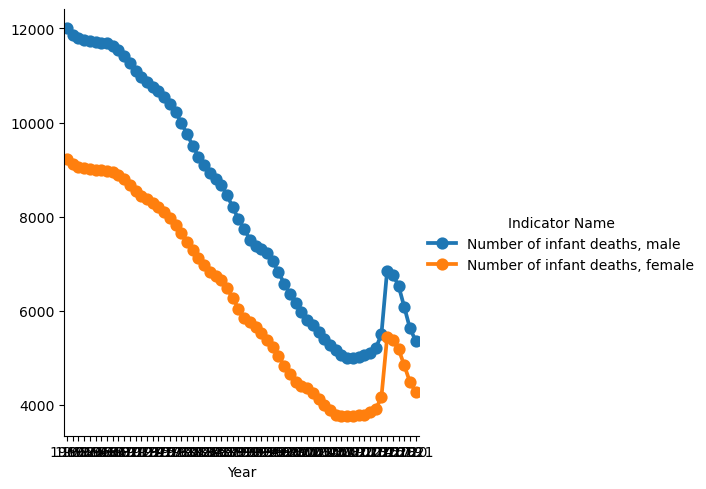

In [210]:
vn_fe_male_infant= vn_fe_male[vn_fe_male["Indicator Name"].isin(["Number of infant deaths, male", "Number of infant deaths, female"])]

vn_plot3=sns.catplot(data = vn_fe_male_infant, 
            x = 'Year',
            y= 'Value',
            kind = 'point',
            hue= 'Indicator Name');
vn_plot3.set(xlabel="Year");
vn_plot3.set(ylabel="");

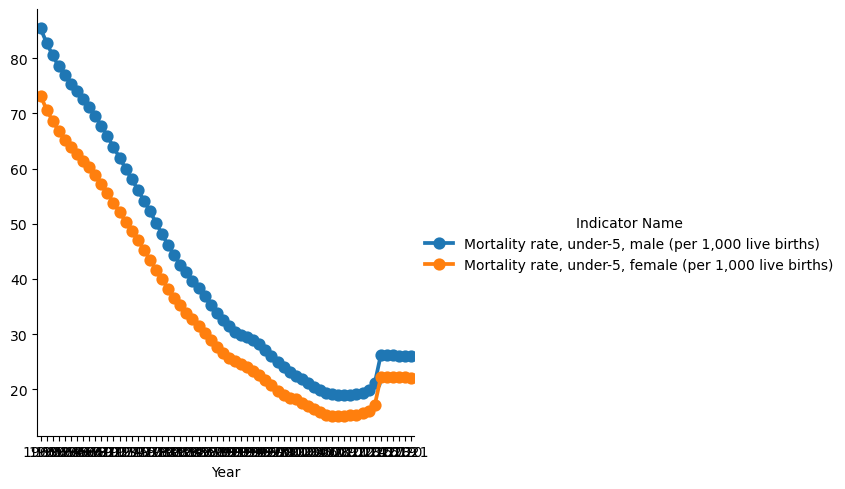

In [211]:
vn_fe_male_under5mr= vn_fe_male[vn_fe_male["Indicator Name"].isin(["Mortality rate, under-5, male (per 1,000 live births)","Mortality rate, under-5, female (per 1,000 live births)"])]

vn_plot4=sns.catplot(data = vn_fe_male_under5mr, 
            x = 'Year',
            y= 'Value',
            kind = 'point',
            hue= 'Indicator Name');
vn_plot4.set(xlabel="Year");
vn_plot4.set(ylabel="");

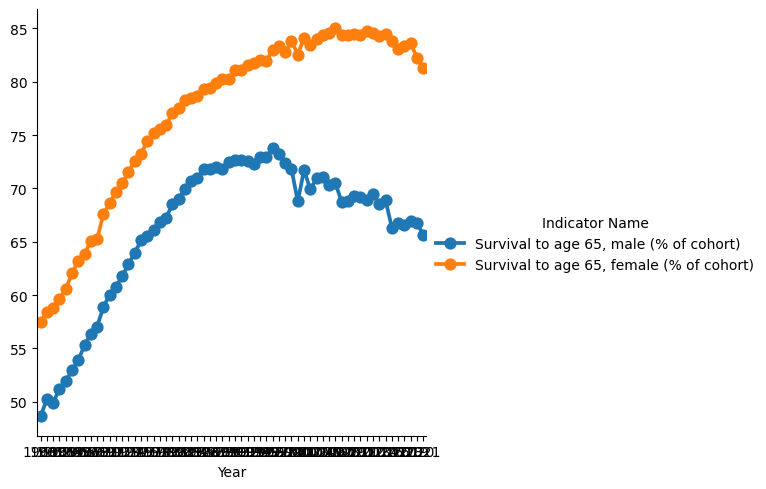

In [447]:
vn_fe_male_survival= vn_fe_male[vn_fe_male["Indicator Name"].isin(["Survival to age 65, male (% of cohort)", "Survival to age 65, female (% of cohort)"])]
vn_plot5=sns.catplot(data = vn_fe_male_survival, 
            x = 'Year',
            y= 'Value',
            kind = 'point',
            hue= 'Indicator Name');
vn_plot5.set(xlabel="Year");
vn_plot5.set(ylabel="");

/var/folders/5r/6ksfq_q13tz1z_vz8b4fdcw00000gn/T/ipykernel_54198/3974697536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vn_fe_male_prevalence["Value"]=vn_fe_male_prevalence["Value"].astype(int)


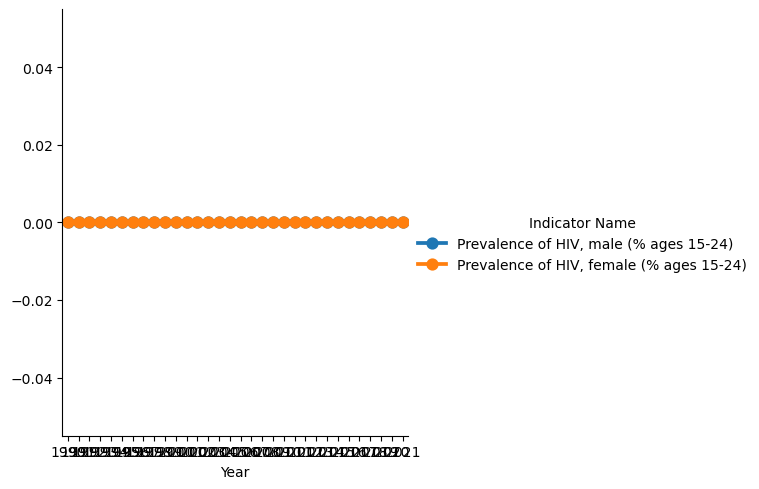

In [487]:
vn_fe_male_prevalence= vn_fe_male[vn_fe_male["Indicator Name"].isin(["Prevalence of HIV, male (% ages 15-24)", "Prevalence of HIV, female (% ages 15-24)"])]

vn_plot6=sns.catplot(data = vn_fe_male_prevalence, 
            x = 'Year',
            y= 'Value',
            kind = 'point',
            hue= 'Indicator Name');
vn_plot6.set(xlabel="Year");
vn_plot6.set(ylabel="");

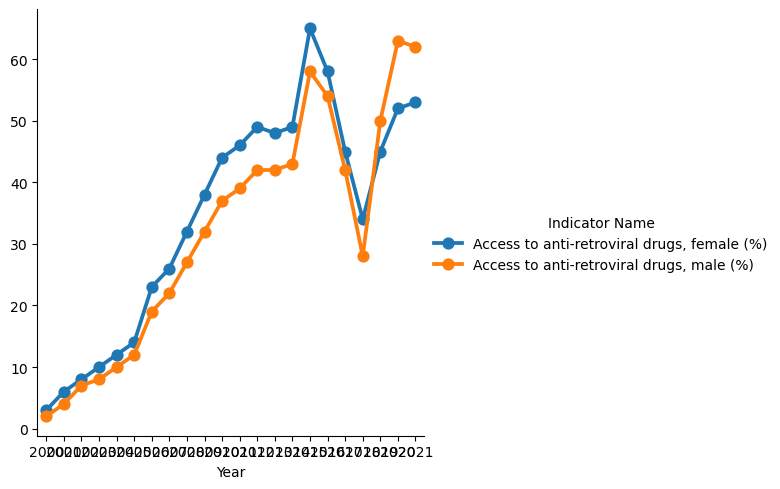

In [448]:
vn_fe_male_ART= vn_fe_male[vn_fe_male["Indicator Name"].isin(["Access to anti-retroviral drugs, female (%)", 
"Access to anti-retroviral drugs, male (%)"])]

vn_plot7=sns.catplot(data = vn_fe_male_ART, 
            x = 'Year',
            y= 'Value',
            kind = 'point',
            hue= 'Indicator Name');
vn_plot7.set(xlabel="Year");
vn_plot7.set(ylabel="");

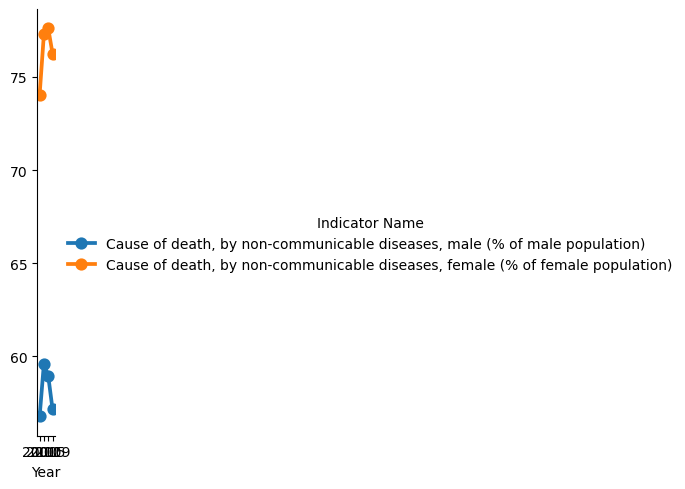

In [235]:
vn_fe_male_ncd= vn_fe_male[vn_fe_male["Indicator Name"].isin(["Cause of death, by non-communicable diseases, male (% of male population)", 
"Cause of death, by non-communicable diseases, female (% of female population)"])]

vn_plot8=sns.catplot(data = vn_fe_male_ncd, 
            x = 'Year',
            y= 'Value',
            kind = 'point',
            hue= 'Indicator Name');
vn_plot8.set(xlabel="Year");
vn_plot8.set(ylabel="");


In [593]:
index_values = ["Mortality rate, adult, male (per 1,000 male adults)", "Mortality rate, adult, female (per 1,000 female adults)", 
"Number of under-five deaths, male", "Number of under-five deaths, female", 
"Number of infant deaths, male", "Number of infant deaths, female", "Mortality rate, under-5, male (per 1,000 live births)",
"Mortality rate, under-5, female (per 1,000 live births)", 
"Mortality rate, infant, male (per 1,000 live births)", "Mortality rate, infant, female (per 1,000 live births)", 
"Survival to age 65, male (% of cohort)", "Survival to age 65, female (% of cohort)", 
"Prevalence of HIV, male (% ages 15-24)", "Prevalence of HIV, female (% ages 15-24)", "Access to anti-retroviral drugs, female (%)", 
"Access to anti-retroviral drugs, male (%)", "Cause of death, by non-communicable diseases, male (% of male population)", 
"Cause of death, by non-communicable diseases, female (% of female population)"]
vn_fe_male= vn_available.loc[index_values]
vn_fe_male.reset_index(inplace=True)
vn_fe_male.head(5)

,Indicator Name,Indicator Code,Country Name,Country Code,Year,Value
0,"Mortality rate, adult, male (per 1,000 male ad...",SP.DYN.AMRT.MA,"Venezuela, RB",VEN,2021,248.498
1,"Mortality rate, adult, male (per 1,000 male ad...",SP.DYN.AMRT.MA,"Venezuela, RB",VEN,2020,241.044
2,"Mortality rate, adult, male (per 1,000 male ad...",SP.DYN.AMRT.MA,"Venezuela, RB",VEN,2019,230.673
3,"Mortality rate, adult, male (per 1,000 male ad...",SP.DYN.AMRT.MA,"Venezuela, RB",VEN,2018,234.512
4,"Mortality rate, adult, male (per 1,000 male ad...",SP.DYN.AMRT.MA,"Venezuela, RB",VEN,2017,233.103
